<a href="https://colab.research.google.com/github/emmad225/DataScienceCoursework/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
# reshape (need the last channel because )
train_images = train_images.reshape((60000, 28 , 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 , 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
ff_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
ff_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
ff_history = ff_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
cnn_history = cnn_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the accuracy of the models on the test data
ff_loss, ff_acc = ff_model.evaluate(test_images, test_labels)
cnn_loss, cnn_acc = cnn_model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4987 - accuracy: 0.8212 - val_loss: 0.4211 - val_accuracy: 0.8492
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3689 - accuracy: 0.8648 - val_loss: 0.3736 - val_accuracy: 0.8673
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3340 - accuracy: 0.8774 - val_loss: 0.3828 - val_accuracy: 0.8626
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3112 - accuracy: 0.8852 - val_loss: 0.3549 - val_accuracy: 0.8741
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2914 - accuracy: 0.8917 - val_loss: 0.3621 - val_accuracy: 0.8718
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2772 - accuracy: 0.8965 - val_loss: 0.3385 - val_accuracy: 0.8812
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2658 - accuracy: 0.9006 - val_loss: 0.3494 - val_accurac

313/313 [==============================] - 3s 11ms/step


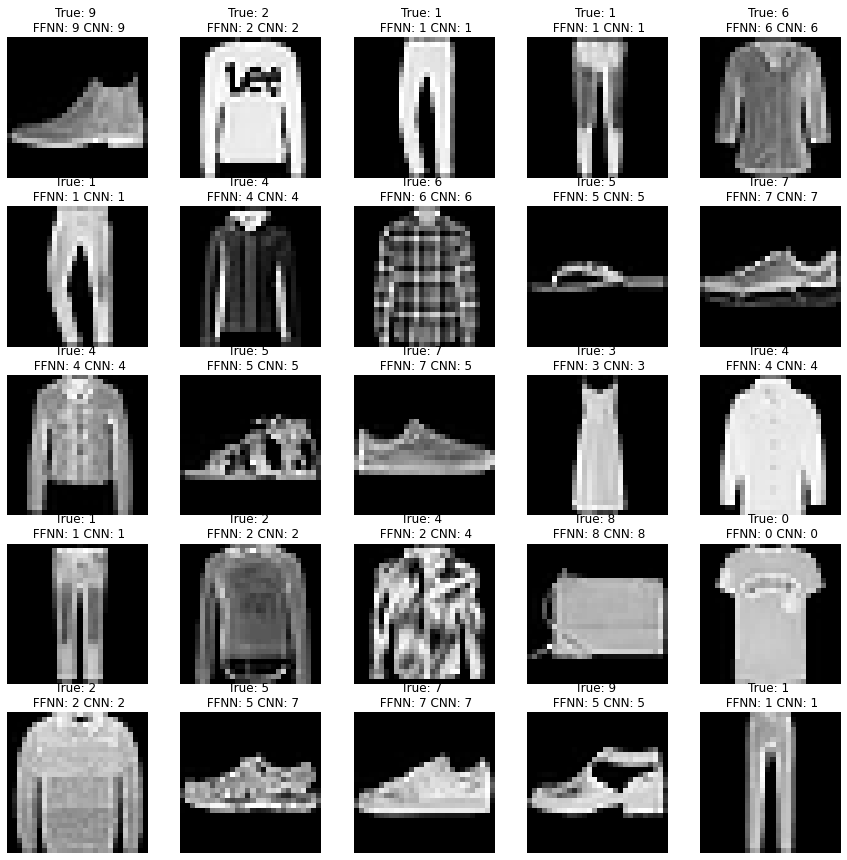

In [ ]:
# Plot several images that the models got right and wrong
predictions_ff = ff_model.predict(test_images)
predictions_conv = cnn_model.predict(test_images)

fig, axs = plt.subplots(5, 5, figsize=(15, 15))
axs = axs.ravel()

for i in range(25):
    axs[i].imshow(test_images[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(f"True: {(test_labels[i])} \n FFNN: {np.argmax(predictions_ff[i])} CNN: {np.argmax(predictions_conv[i])}")
    axs[i].axis('off')

plt.show()

In [ ]:
print("Feedforward Neural Network accuracy:", ff_acc)
print("Convolutional Neural Network accuracy:", cnn_acc)

Feedforward Neural Network accuracy: 0.8783000111579895
Convolutional Neural Network accuracy: 0.9014999866485596


As we can see from the code above, I created two different neural networks: a convolutional neural network and a feedforward network. The accuracy score of the convolutional neural network is 3% more accurate than the feedforward neural network at 90%. The photos above of various fashion items have a true encoded number as well as an estimate from each neural network. The feed forward network gets the prediction wrong 2/25 times while the convolutional neural network predicts wrong 3/25 times. It is very interesting to see how phoo recognition happens behind the scenes and how well technology is able to guess correctly.